In [3]:
import networkx as nx
%matplotlib inline

In [106]:
network = {}

In [146]:
with open('demo.txt', 'r') as f:
    line = f.readline()
    while line:
        line = line.split()
        network[line[0]] = line[1:]
        line = f.readline()     

In [122]:
network

{'2': ['1', '3', '4'], '3': ['1', '2', '4'], '1': ['2', '3'], '4': ['2', '3']}

In [109]:
g = nx.Graph(network)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


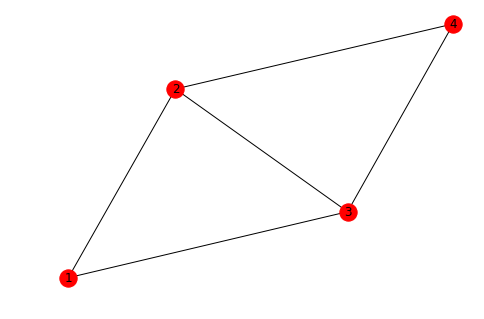

In [110]:
nx.draw(g, with_labels=True)

In [149]:
import random
import copy

In [173]:
def random_contraction_algo(graph):

    cuts = {}
    while len(graph) > 2:
        # choice an edge
        u = random.choice(list(graph.keys()))
        v = random.choice(graph[u])
        
        # delete edge
        graph[u].remove(v)
        graph[v].remove(u)
        
        print("delete edge {}-{}".format(u,v))
        
        if v in graph[u]:
            continue
        
        # contraction
        if len(graph[u]) > len(graph[v]):
            u,v = v, u
            
        print("contraction {}->{}".format(u, v))
        
        graph[v] += graph[u]
        for node in graph[u]:
            graph[node] = [v if x == u else x for x in graph[node]]
        del graph[u]
        
        # put u,v in cut
        if v in cuts.keys():
            cuts[v] += u
        else:
            if u in cuts.keys():
                cuts[v] = cuts[u] + [u]
        uv_is_in_cut = False
        for cut in cuts:
            if u or v in cut:
                cut.update([u,v])
                uv_is_in_cut = True
                break
        if uv_is_in_cut is False:
            cuts.append(set([u,v]))
       
    return graph, cuts

In [174]:
gra = copy.deepcopy(network)
g,cut = random_contraction_algo(gra)
cut

delete edge 4-2
contraction 4->2
delete edge 1-3
contraction 1->3


[{'1', '2', '3', '4'}]

In [170]:
g

{'2': ['3', '3', '3'], '3': ['2', '2', '2']}